# Tips Data Exploration
## by (Adelami Niyi Victor)

## Introduction
> This dataset is a compilation of tips given in a restaurant over a period of time. It contains the followind variables:

    1.  __Total_bill__: The total amoung of food bought 
    2.  __Tip__: The amount of tip given
    3.  __Sex__: The sex of the person giving the tip
    4.  __Smoker__: The smoking status of the tip giver
    5.  __Day__: The day of the week (Thur, Fri, Sat and Sun)
    6.  __Time__: Time of the Day (Lunch or Dinner)
    7.  __Size__: The portions of food bought
    
    
## Preliminary Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

from sklearn.model_selection import train_test_split

%matplotlib inline
%run ./library/niyi_lib.py

In [2]:
tips = sns.load_dataset('tips')

In [3]:
#Check important information about the dataset using the imported niyi_lib function
stats(tips)

			Datatypes
---------------------------------------------------------------------------------------------------------
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object 


			Rows and Columns
---------------------------------------------------------------------------------------------------------
There are 244 rows and 7 columns in the dataset


			Missing Values
---------------------------------------------------------------------------------------------------------
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64 


			Percentage of Missing Values
---------------------------------------------------------------------------------------------------------
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: floa

### Assessing dataset

In [6]:
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
106,20.49,4.06,Male,Yes,Sat,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
99,12.46,1.50,Male,No,Fri,Dinner,2
231,15.69,3.00,Male,Yes,Sat,Dinner,3
119,24.08,2.92,Female,No,Thur,Lunch,4
168,10.59,1.61,Female,Yes,Sat,Dinner,2
36,16.31,2.00,Male,No,Sat,Dinner,3
233,10.77,1.47,Male,No,Sat,Dinner,2
164,17.51,3.00,Female,Yes,Sun,Dinner,2


In [7]:
#Average tips given by customers 
tips.tip.mean()

3.0023868312757203

# Quality Issues
* There is a duplicated row in the dataset

## Cleaning Dataset

#### Define:
Drop duplicated row


#### Code:

In [53]:
tips.drop_duplicates(inplace=True)

#### Test:
Confirm that there is no more duplicates using assert

In [54]:
assert tips.duplicated().sum()==0

## Univariate Visualization

In [8]:
base_color = sns.color_palette()[0]

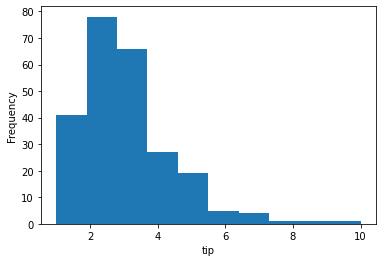

In [9]:
tips.tip.plot(kind='hist', color = base_color)
plt.xlabel('tip');

(<AxesSubplot:xlabel='sex', ylabel='count'>,)

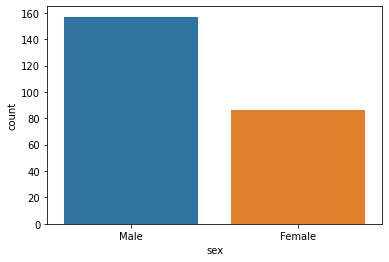

In [59]:
sns.countplot(data=tips, x = 'sex');

##### Observation:
There are more male than female in the dataset, it will be important to make any visualization on gender percentage wise.

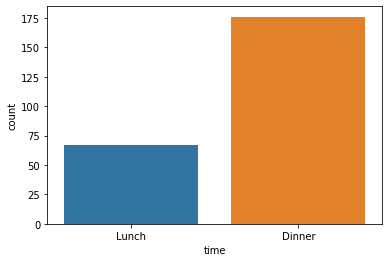

In [60]:
sns.countplot(data=tips, x = 'time');

##### Observation:
There are more dinner observations than lunch in the dataset, this might cause imbalance.
it will be important to make any visualization on these a percentage

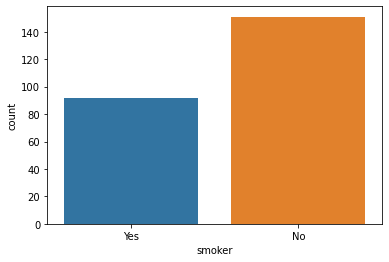

In [61]:
sns.countplot(data=tips, x = 'smoker');

##### Observation:
There are more non smokers than smokers in the dataset, this might cause imbalance.
it will be important to make any visualization on these a percentage

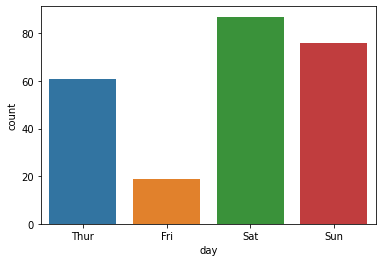

In [62]:
sns.countplot(data=tips, x = 'day');

##### Observation:
There are very few data on friday observation, this might cause imbalance. it will be important to make any visualization on these a percentage

## Bivariate Visualization

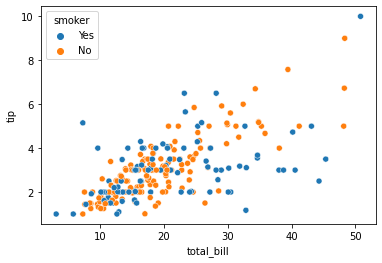

In [71]:
sns.scatterplot(data=tips, y='tip', x='total_bill', hue = 'smoker');

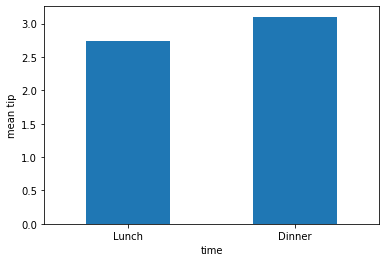

In [72]:
tips.groupby('time')['tip'].mean().plot(kind='bar', color=base_color)
plt.ylabel('mean tip')
plt.xticks(rotation=0);

<AxesSubplot:xlabel='time', ylabel='tip'>

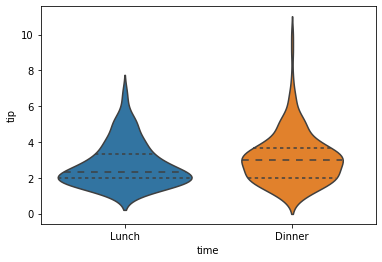

In [13]:
sns.violinplot(data = tips, x = 'time', y = 'tip', inner='quartile')

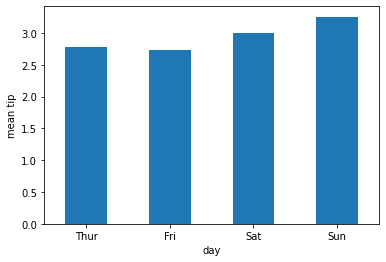

In [14]:
tips.groupby('day')['tip'].mean().plot(kind='bar', color=base_color)
plt.ylabel('mean tip')
plt.xticks(rotation=0);

<AxesSubplot:xlabel='day', ylabel='tip'>

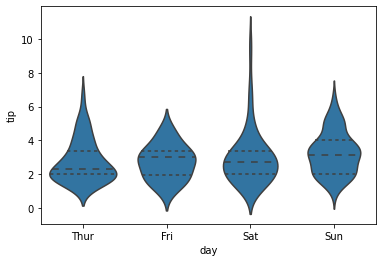

In [15]:
sns.violinplot(data = tips, x = 'day', y = 'tip', inner='quartile', color=base_color)

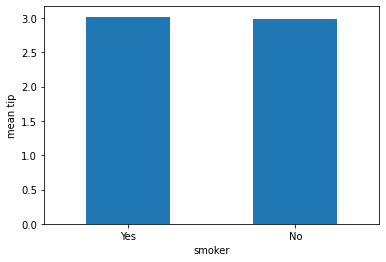

In [16]:
tips.groupby('smoker')['tip'].mean().plot(kind='bar', color=base_color)
plt.ylabel('mean tip')
plt.xticks(rotation=0);

<AxesSubplot:xlabel='smoker', ylabel='tip'>

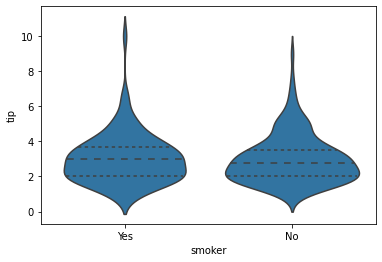

In [142]:
sns.violinplot(data = tips, x = 'smoker', y = 'tip', inner='quartile', color=base_color)

<AxesSubplot:xlabel='sex', ylabel='tip'>

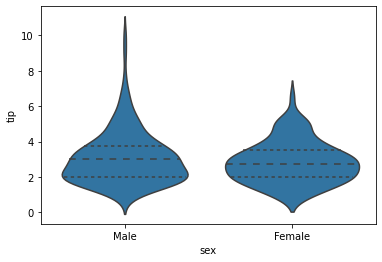

In [18]:
sns.violinplot(data = tips, x = 'sex', y = 'tip', inner='quartile', color=base_color)

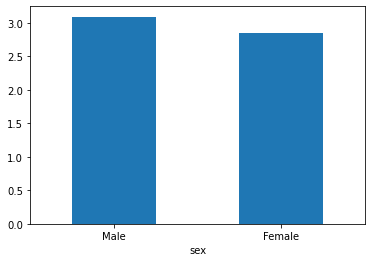

In [19]:
tips.groupby('sex')['tip'].mean().plot(kind='bar', color=base_color)
plt.xticks(rotation=0);

## Multivariate Visualization

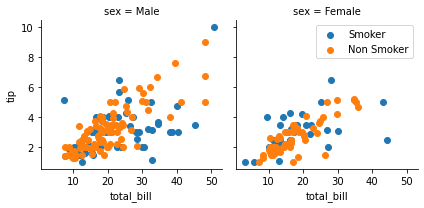

In [70]:
facet = sns.FacetGrid(tips, col='sex', hue='smoker')
facet.map(plt.scatter, 'total_bill', 'tip')
plt.legend(['Smoker', 'Non Smoker'])

#### Observation:
* Male seems to give more tip than female, this might be becase there are more male observations than female. 
* There seems to be no significant difference between smolers and non smokers

## Tips Prediction

In [73]:
#for us to be able to work with a machine learning algorithm, we need to encode the string data.

tips_dummy = pd.get_dummies(tips, drop_first=False)
tips_dummy.sample(20)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
199,13.51,2.00,2,1,0,1,0,1,0,0,0,1,0
149,7.51,2.00,2,1,0,0,1,1,0,0,0,1,0
102,44.30,2.50,3,0,1,1,0,0,0,1,0,0,1
117,10.65,1.50,2,0,1,0,1,1,0,0,0,1,0
87,18.28,4.00,2,1,0,0,1,1,0,0,0,1,0
141,34.30,6.70,6,1,0,0,1,1,0,0,0,1,0
139,13.16,2.75,2,0,1,0,1,1,0,0,0,1,0
83,32.68,5.00,2,1,0,1,0,1,0,0,0,1,0
131,20.27,2.83,2,0,1,0,1,1,0,0,0,1,0
138,16.00,2.00,2,1,0,1,0,1,0,0,0,1,0


In [74]:
#seperate data into features and target, where feature is 'X' and target is 'y'
X = tips_dummy[['total_bill', 'size', 'sex_Male', 'sex_Female', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']]
y = tips_dummy['tip']

In [75]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

#### LinearRegression

In [23]:
#create a linear regression model
model = linear_model.LinearRegression()

In [24]:
#use the train set to fit the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
model.coef_

array([ 0.08020629,  0.19336931, -0.02550841,  0.02550841,  0.11253014,
        0.04351797, -0.15306667, -0.00298145, -0.06614742,  0.06614742])

In [26]:
#make prediction with the model
model.predict(X_test)

array([2.80975909, 2.31905612, 5.16349848, 3.11575971, 2.26836662,
       2.87730398, 2.45084956, 4.59860314, 2.59121057, 3.76958529,
       2.38883559, 3.81586118, 2.0465104 , 2.25713774, 2.78496729,
       3.3396675 , 5.45133961, 2.95589407, 2.10040814, 3.64596815,
       2.46127638, 2.44337587, 2.78820284, 1.62183176, 2.37436369,
       2.34415496, 2.08629834, 4.26285398, 2.93826076, 3.05542202,
       2.42252223, 4.35805641, 3.44394775, 1.99934822, 3.30582132,
       4.53063217, 2.32334687, 3.74792959, 3.27991226, 5.44098494,
       2.83157432, 3.50874324, 2.03672997, 2.38588246, 2.98660028,
       1.74177911, 4.73115927, 2.06656197, 2.25504675])

In [27]:
#check the accuracy of the prediction
model.score(X_test, y_test)

0.5792177332855037

#### SVM

In [76]:
#import necessary libraries for SVR and SVC
from sklearn.svm import SVR
from sklearn.svm import SVC
#import libraries for pipeline
from sklearn.pipeline import make_pipeline
#import data scaling library
from sklearn.preprocessing import StandardScaler

##### SVM_SVR with standard scaler

In [133]:
#create a pipeline with StandardScaler and SVR
regresn = make_pipeline(StandardScaler(), SVR(C=4.0, kernel='linear', epsilon=0.3))


In [134]:
regresn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.0, epsilon=0.3, kernel='linear'))])

In [135]:
regresn.score(X_test, y_test)

0.5819591546183388

##### SVM_SVR without standard scaler

In [128]:
clf = SVR(kernel='poly', C=2, epsilon=0.2).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.5093163592982917

In [139]:
clf = svm.LinearSVR( C=2).fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5927745568626216

In [38]:
from sklearn import svm

In [136]:
from sklearn import preprocessing
from sklearn import utils

In [137]:
# Use label encoder to be able to work with SVC
# SVC works with classification problem while SVR is a regression problem
label = preprocessing.LabelEncoder() 
y_transfromed = label.fit_transform(y)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transfromed, test_size=0.20, random_state=40)

In [42]:
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.08163265306122448

In [48]:
clf = svm.LinearSVR( C=2).fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.592113851690143